# Import libraries

In [1]:
from scipy.stats import spearmanr
import pandas as pd
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

# Cancer type

In [2]:
cancer_type = 'OV'

# Import data

In [3]:
rna_df = pd.read_csv(f'{cancer_type}_rna.csv')
protein_df = pd.read_csv(f'{cancer_type}_protein.csv')
image_df = pd.read_csv(f'{cancer_type}_image.csv')
survival_df = pd.read_csv(f'{cancer_type}_survival.csv')
rna_df.set_index('GeneSymbol',inplace=True)
protein_df.set_index('GeneSymbol',inplace=True)
image_df.set_index('0',inplace=True)

In [4]:
rna_df

,TCGA-09-2056,TCGA-13-1410,TCGA-13-1489,TCGA-13-1497,TCGA-13-1507,TCGA-13-1511,TCGA-13-2060,TCGA-23-1122,TCGA-24-1103,TCGA-24-1416,...,TCGA-61-1724,TCGA-61-1741,TCGA-61-1907,TCGA-61-1910,TCGA-61-1914,TCGA-61-1918,TCGA-61-1995,TCGA-61-2008,TCGA-61-2088,TCGA-61-2094
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,152.0849,287.3001,57.5135,93.2781,724.0000,120.1016,222.1982,129.8043,7.9529,78.5955,...,329.8109,27.0064,310.1218,26.4023,68.7224,167.8771,65.0279,161.1518,139.8443,107.0148
A2M,4322.5695,5060.4870,2100.8237,3932.2299,3105.9842,3203.7409,4258.3263,12059.0903,6094.1650,4339.3134,...,8535.9993,4617.3059,7146.3642,4219.1199,4212.4035,5168.4067,8756.5674,9388.1801,2341.1780,12316.8374
AACS,1100.1384,701.9847,498.4532,680.4621,442.2164,1387.1070,757.7750,477.5146,2157.5826,836.4544,...,698.7284,721.3329,560.5155,958.4139,655.2108,878.8976,1162.0008,652.3624,581.7333,1031.6922
AAK1,1072.8196,7039.6541,475.6381,559.7017,609.4987,2230.2318,1632.1875,2171.6444,828.5080,1270.2871,...,3275.8396,1641.2937,392.4736,1497.0986,904.9165,2604.5847,2259.7963,1941.5231,2414.1152,3565.2116
AAMP,2518.8740,2725.6880,3748.2599,2525.6642,2093.4037,2374.0870,4419.6774,2548.5754,3762.6706,2084.2697,...,2850.4271,2098.2250,1433.9949,3247.5822,1747.9402,2837.0086,2360.4037,2065.1473,3242.8646,1468.8725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNFX1,1223.8117,7017.1610,800.8507,1366.6942,1493.9314,2721.1813,1815.2642,2833.5050,3104.4488,1943.8202,...,5080.5347,3281.7162,2449.5769,1776.5957,1880.6897,1666.7425,2524.6431,2269.7054,1549.0400,4248.4885
ZRANB2,2014.1837,1100.5414,1530.0077,2268.4239,2356.8971,958.7742,1561.3745,1506.9207,1053.8752,1157.7278,...,1055.7711,1951.1358,1685.9055,3118.2689,1894.2464,1344.9769,1518.9506,1506.6326,3788.7494,1598.3097
ZW10,241.4398,467.9898,718.4841,697.3603,444.3272,371.5465,434.8071,313.7659,631.5560,332.0849,...,283.3388,569.3129,593.2217,190.5222,454.1657,501.2687,684.4741,594.9972,321.7436,489.2698


In [5]:
protein_df

,TCGA-09-2056,TCGA-13-1410,TCGA-13-1489,TCGA-13-1497,TCGA-13-1507,TCGA-13-1511,TCGA-13-2060,TCGA-23-1122,TCGA-24-1103,TCGA-24-1416,...,TCGA-61-1724,TCGA-61-1741,TCGA-61-1907,TCGA-61-1910,TCGA-61-1914,TCGA-61-1918,TCGA-61-1995,TCGA-61-2008,TCGA-61-2088,TCGA-61-2094
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.246381,-0.035741,0.201573,-0.492555,-0.364644,-0.227778,-0.270755,0.516123,-0.041838,0.061463,...,-0.572692,-0.327510,-0.338531,-0.463658,-0.271400,0.221467,0.062611,0.931362,-0.271876,0.239437
A2M,0.499874,0.407090,-0.033711,-0.494733,-0.520179,-0.094671,-0.764951,0.556124,-0.105360,-0.704367,...,-0.646824,-0.157549,0.141596,-0.346649,-0.150674,-0.156248,-0.311775,0.079145,-0.503649,0.233438
AACS,0.536439,0.289201,-0.338327,0.099107,0.052496,0.569175,0.409183,0.372676,0.721812,0.061181,...,-0.146538,-0.178751,0.010550,0.022993,0.415120,0.163925,0.181866,-0.712378,0.483363,0.138217
AAK1,0.116041,0.872564,0.048875,-0.284606,-0.103077,0.064664,0.102370,-0.153207,-0.481375,-0.257371,...,0.564487,-0.234626,-0.635950,-0.295176,-0.084698,0.117323,-0.084654,-0.093453,-0.179366,0.167943
AAMP,0.118749,0.145701,0.537324,-0.159285,0.368837,-0.348322,0.772666,-0.097460,0.510617,0.035661,...,-0.148612,0.258129,-0.448530,0.481794,-0.214254,0.041985,0.206757,-0.328205,0.310020,-0.167559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNFX1,-0.076906,0.457255,0.015935,0.034685,0.203580,0.100043,0.061164,-0.111000,0.111379,-0.181430,...,0.352861,-0.165048,0.042713,-0.172751,0.658854,-0.417143,-0.081105,-0.210426,-0.011678,0.248410
ZRANB2,0.162208,-0.123976,-0.011057,0.276369,0.203612,-0.521477,0.243731,-0.223615,-0.154831,0.259829,...,-0.116658,0.421132,-0.056181,0.755178,0.088864,-0.061557,0.070300,0.220604,0.607484,-0.207537
ZW10,-0.090297,-0.065289,0.447873,0.313415,-0.113623,0.102774,0.248640,-0.017560,-0.096806,0.055677,...,-0.085904,-0.004010,0.002622,-0.266504,0.171510,-0.165282,0.229577,-0.105074,-0.307365,0.187472


In [6]:
image_df

,TCGA-09-2056,TCGA-13-1410,TCGA-13-1489,TCGA-13-1497,TCGA-13-1507,TCGA-13-1511,TCGA-13-2060,TCGA-23-1122,TCGA-24-1103,TCGA-24-1416,...,TCGA-61-1724,TCGA-61-1741,TCGA-61-1907,TCGA-61-1910,TCGA-61-1914,TCGA-61-1918,TCGA-61-1995,TCGA-61-2008,TCGA-61-2088,TCGA-61-2094
0,,,,,,,,,,,,,,,,,,,,,
area_bin1,0.031517,0.026182,0.027191,0.031779,0.027231,0.028106,0.028985,0.033852,0.032433,0.028314,...,0.027842,0.037337,0.028856,0.036752,0.027225,0.029929,0.026678,0.028239,0.037021,0.029087
area_bin2,0.147003,0.123931,0.106753,0.137281,0.132124,0.142875,0.146379,0.160867,0.130956,0.131338,...,0.153331,0.147431,0.130779,0.132668,0.140143,0.115190,0.139689,0.138289,0.163703,0.126631
area_bin3,0.136353,0.122228,0.105309,0.137105,0.122723,0.132706,0.137083,0.158670,0.130360,0.119748,...,0.128704,0.128024,0.122127,0.131881,0.121792,0.111720,0.130865,0.120755,0.145389,0.122757
area_bin4,0.138675,0.130256,0.116485,0.143786,0.124647,0.135418,0.138521,0.134830,0.132800,0.124467,...,0.123985,0.124050,0.126510,0.136751,0.119406,0.119238,0.131255,0.120231,0.139163,0.130015
area_bin5,0.127463,0.129196,0.122253,0.133239,0.124054,0.130268,0.129269,0.125997,0.136987,0.123110,...,0.117567,0.118793,0.126654,0.133496,0.119130,0.122853,0.126638,0.117790,0.126269,0.130340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
distMin_bin6,0.035208,0.045947,0.039908,0.024007,0.044805,0.049815,0.052610,0.046038,0.034384,0.048827,...,0.069205,0.037292,0.031640,0.010295,0.075633,0.033712,0.047264,0.065831,0.032938,0.033765
distMin_bin7,0.013502,0.025388,0.018356,0.010642,0.020238,0.026799,0.028919,0.025898,0.015922,0.020755,...,0.033679,0.015878,0.012293,0.003557,0.043771,0.017327,0.019555,0.039287,0.015186,0.014895
distMin_bin8,0.003598,0.010044,0.005385,0.003755,0.005336,0.010679,0.011060,0.012556,0.005359,0.005327,...,0.009700,0.004032,0.003222,0.001028,0.015999,0.006393,0.005499,0.017695,0.004695,0.005154


In [7]:
survival_df

,ID,Days to death,Vital Status
0,TCGA-13-1489,2553.0,Dead
1,TCGA-13-1507,1993.0,Dead
2,TCGA-13-1511,1650.0,Dead
3,TCGA-23-1122,1189.0,Dead
4,TCGA-24-1103,1646.0,Dead
5,TCGA-24-1430,863.0,Dead
6,TCGA-24-1435,1324.0,Dead
7,TCGA-24-1474,676.0,Dead
8,TCGA-24-1544,820.0,Dead
9,TCGA-24-1548,493.0,Dead


# Correlation Analysis

In [8]:
cor_rna_df = pd.DataFrame(np.zeros((image_df.shape[0], rna_df.shape[0])))
cor_rna_df.columns = rna_df.index
cor_rna_df.index = image_df.index
cor_rna_df.columns.name = 'mRNAGeneSymbol'
cor_rna_df.index.name = 'imageFeatures'

In [9]:
cor_protein_df = pd.DataFrame(np.zeros((image_df.shape[0], protein_df.shape[0])))
cor_protein_df.columns = protein_df.index
cor_protein_df.index = image_df.index
cor_protein_df.columns.name = 'proteinGeneSymbol'
cor_protein_df.index.name = 'imageFeatures'

In [10]:
counter = 0
total = image_df.shape[0] * protein_df.shape[0]
percent = round(total/100)
if percent <= 0:
    percent = 1
print(f'Correlation analysis with {total} pairs...')
for i in range(image_df.shape[0]):
    l1 = image_df.iloc[i].tolist()
    for j in range(rna_df.shape[0]):
        l2 = rna_df.iloc[j].tolist()
        l3 = protein_df.iloc[j].tolist()
        counter += 1
        cor_rna_df.iat[i,j] = spearmanr(l1, l2)[0]
        cor_protein_df.iat[i,j] = spearmanr(l1, l3)[0]
        if counter % percent == 0:
            print(f'Processed {round(counter/total*100)}%...')

Correlation analysis with 461600 pairs...


c:\users\steve\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\steve\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Processed 1%...
Processed 2%...
Processed 3%...
Processed 4%...
Processed 5%...
Processed 6%...
Processed 7%...
Processed 8%...
Processed 9%...
Processed 10%...
Processed 11%...
Processed 12%...
Processed 13%...
Processed 14%...
Processed 15%...
Processed 16%...
Processed 17%...
Processed 18%...
Processed 19%...
Processed 20%...
Processed 21%...
Processed 22%...
Processed 23%...
Processed 24%...
Processed 25%...
Processed 26%...
Processed 27%...
Processed 28%...
Processed 29%...
Processed 30%...
Processed 31%...
Processed 32%...
Processed 33%...
Processed 34%...
Processed 35%...
Processed 36%...
Processed 37%...
Processed 38%...
Processed 39%...
Processed 40%...
Processed 41%...
Processed 42%...
Processed 43%...
Processed 44%...
Processed 45%...
Processed 46%...
Processed 47%...
Processed 48%...
Processed 49%...
Processed 50%...
Processed 51%...
Processed 52%...
Processed 53%...
Processed 54%...
Processed 55%...
Processed 56%...
Processed 57%...
Processed 58%...
Processed 59%...
Proces

In [11]:
cor_rna_df

mRNAGeneSymbol,A1BG,A2M,AACS,AAK1,AAMP,AARS1,AARSD1,AASDHPPT,AATF,ABAT,...,ZNF598,ZNF618,ZNF638,ZNF787,CHAMP1,ZNFX1,ZRANB2,ZW10,ZYX,ZZEF1
imageFeatures,,,,,,,,,,,,,,,,,,,,,
area_bin1,0.059768,-0.097744,0.058154,-0.049569,0.279262,-0.044675,-0.064689,-0.063787,0.058893,0.052714,...,0.103623,0.310103,0.171975,0.190321,0.169815,-0.230513,0.160164,-0.069036,-0.200930,-0.011811
area_bin2,0.092112,0.068298,0.138510,0.042488,0.185154,0.049214,-0.144142,-0.234231,0.021572,0.216022,...,0.071278,0.162187,0.151141,0.145537,-0.030130,-0.108681,0.054846,-0.279617,0.031032,-0.092249
area_bin3,0.032180,0.091155,0.126425,-0.040437,0.205167,-0.017854,-0.131511,-0.302529,-0.016979,0.137006,...,-0.017334,0.165742,0.028407,0.198988,0.054081,-0.167191,-0.040355,-0.279344,0.000629,-0.110977
area_bin4,0.015229,0.088968,0.108790,-0.069665,0.123308,0.009487,-0.109474,-0.288804,-0.065099,0.094245,...,-0.096159,0.072864,-0.037649,0.141162,0.033630,-0.193411,-0.092303,-0.243937,0.022884,-0.125058
area_bin5,-0.011675,0.144470,0.114860,-0.086452,0.012550,-0.124812,-0.056077,-0.189228,-0.044703,-0.033657,...,-0.170554,0.030294,-0.116500,0.115871,0.130417,-0.174737,-0.125003,-0.149228,0.008640,-0.108407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
distMin_bin6,0.020232,0.176596,-0.089023,0.189009,-0.175858,0.035981,0.079781,0.054190,0.112891,-0.017389,...,0.185509,-0.091921,0.057252,0.020068,-0.148216,0.308462,-0.086206,-0.070485,0.221736,0.179139
distMin_bin7,0.028872,0.167546,-0.103513,0.192837,-0.119262,0.053944,0.124921,0.059029,0.143705,-0.074887,...,0.193274,-0.100287,0.043773,0.036500,-0.131593,0.276664,-0.116336,-0.085988,0.199481,0.213534
distMin_bin8,0.070813,0.150513,-0.080574,0.178045,-0.045386,0.087163,0.105345,0.090800,0.142939,-0.095858,...,0.212932,-0.069146,0.006097,0.074696,-0.074422,0.219139,-0.117485,-0.045468,0.197102,0.245496


In [12]:
cor_protein_df

proteinGeneSymbol,A1BG,A2M,AACS,AAK1,AAMP,AARS1,AARSD1,AASDHPPT,AATF,ABAT,...,ZNF598,ZNF618,ZNF638,ZNF787,CHAMP1,ZNFX1,ZRANB2,ZW10,ZYX,ZZEF1
imageFeatures,,,,,,,,,,,,,,,,,,,,,
area_bin1,-0.112673,-0.048722,0.035161,-0.165878,0.077321,-0.029255,-0.212276,-0.039590,0.103185,-0.078824,...,0.093561,0.329487,0.309064,0.289077,0.209870,-0.274368,0.114997,-0.150731,-0.418100,0.009651
area_bin2,-0.057690,-0.037485,0.103486,-0.039371,-0.061572,0.069091,-0.213944,-0.323582,0.006234,0.103677,...,0.040328,0.048230,0.148107,0.112891,-0.156172,-0.108407,0.053014,-0.130827,-0.149091,0.055338
area_bin3,-0.089214,-0.006234,0.098264,-0.060451,0.012221,-0.005550,-0.121941,-0.325113,-0.040273,-0.017526,...,0.030622,0.087300,-0.000547,0.250745,-0.047081,-0.087327,-0.013999,-0.195899,-0.083773,0.097252
area_bin4,-0.161722,0.016459,0.098209,-0.026576,0.011483,0.028161,-0.043582,-0.265646,-0.063896,-0.035735,...,0.020260,0.067122,-0.025919,0.222447,0.030185,-0.075325,0.010390,-0.208093,0.022338,0.096623
area_bin5,-0.122515,0.056077,0.065646,-0.001969,0.008995,-0.115899,0.069856,-0.173424,-0.144115,-0.091757,...,-0.079453,0.050936,-0.174518,0.225345,0.054928,-0.014819,-0.108407,-0.186056,0.108790,0.097936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
distMin_bin6,0.258565,0.094381,-0.099768,0.194204,-0.140178,0.008339,0.134764,-0.076801,-0.056022,0.131565,...,0.054026,-0.312563,-0.082734,-0.276664,-0.283445,0.195051,-0.144771,0.208093,0.191114,0.076309
distMin_bin7,0.319262,0.171893,-0.089023,0.198250,-0.108325,-0.000219,0.145974,-0.095038,-0.083664,0.060807,...,0.088941,-0.280602,-0.100506,-0.247081,-0.283363,0.214846,-0.181299,0.154176,0.143322,0.092932
distMin_bin8,0.365988,0.225646,-0.040820,0.186138,-0.076118,0.012085,0.109036,-0.069501,-0.118223,0.035871,...,0.112290,-0.212714,-0.136651,-0.181189,-0.263923,0.209761,-0.219467,0.140670,0.087437,0.134299


# Save raw result

In [13]:
cor_rna_df.to_csv(f'{cancer_type}_cor_rna.csv')  
cor_protein_df.to_csv(f'{cancer_type}_cor_protein.csv')  
image_df.to_csv(f'{cancer_type}_image.csv')  
survival_df.to_csv(f'{cancer_type}_survival.csv')  

In [14]:
cor_df = pd.DataFrame(np.zeros((3, 3)))
cor_df.columns = ['Positive Correlation','Noncorrelation','Negative Correlation']
cor_df.index = ['Positive Correlation','Noncorrelation','Negative Correlation']
cor_df.columns.name = 'image-protein'
cor_df.index.name = 'image-mRNA'

In [15]:
for i in range(cor_rna_df.shape[0]):
    for j in range(cor_rna_df.shape[1]):
        pvalue_r = cor_rna_df.iat[i,j]
        pvalue_p = cor_protein_df.iat[i,j]
        x = ''
        y = ''
        if pvalue_r > 0.3:
            x = 'Positive Correlation'
        elif pvalue_r < -0.3:
            x = 'Negative Correlation'
        else:
            x = 'Noncorrelation'
        if pvalue_p > 0.3:
            y = 'Positive Correlation'
        elif pvalue_p < -0.3:
            y = 'Negative Correlation'
        else:
            y = 'Noncorrelation'     

        cor_df.at[x,y]+=1 

In [16]:
cor_df

image-protein,Positive Correlation,Noncorrelation,Negative Correlation
image-mRNA,,,
Positive Correlation,745.0,3100.0,1.0
Noncorrelation,4364.0,445857.0,4395.0
Negative Correlation,0.0,2513.0,625.0


c:\users\steve\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\steve\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\steve\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


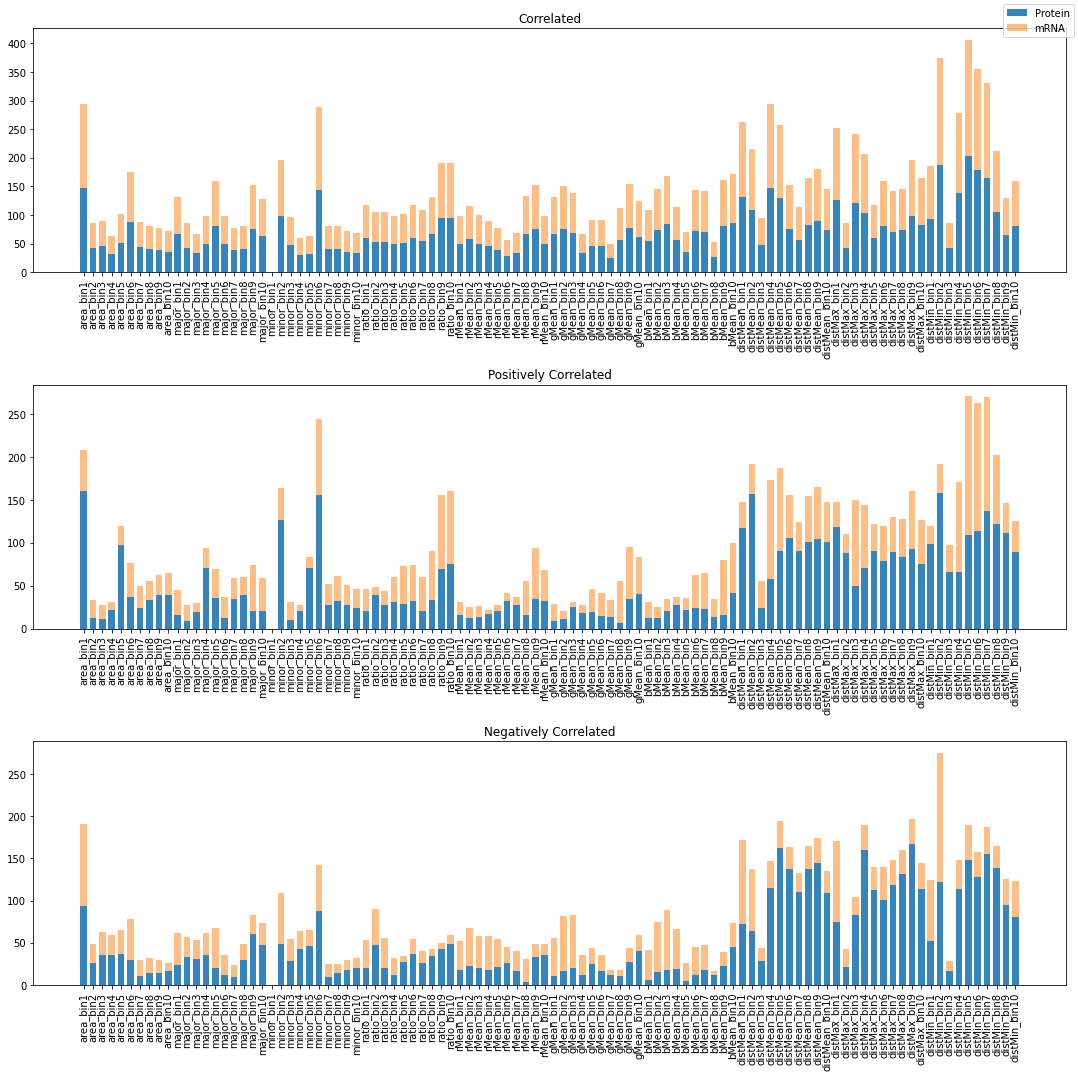

In [19]:
rna_pos = (cor_rna_df>0.3).sum(axis=1).tolist()[0:100]
rna_neg = (cor_rna_df<-0.3).sum(axis=1).tolist()[0:100]
rna_total = list(np.array(rna_pos)+np.array(rna_neg))[0:100]

protein_pos = (cor_protein_df>0.3).sum(axis=1).tolist()[0:100]
protein_neg = (cor_protein_df<-0.3).sum(axis=1).tolist()[0:100]
protein_total = list(np.array(rna_pos)+np.array(rna_neg))[0:100]

features = image_df.index.values.tolist()[0:100]

fig, ax = plt.subplots(3)
fig.set_figwidth(15)
fig.set_figheight(15)


width=0.7
p1 = ax[0].bar(features, protein_total, align='center', alpha=0.9, width = width)
p2 = ax[0].bar(features, rna_total, align='center', alpha=0.5, bottom=protein_total,width = width)
ax[0].set_xticklabels(features, rotation=90)
ax[0].set_title('Correlated')

ax[1].bar(features, protein_pos, align='center', alpha=0.9,width = width)
ax[1].bar(features, rna_pos, align='center', alpha=0.5, bottom=protein_pos,width = width)
ax[1].set_xticklabels(features, rotation=90)
ax[1].set_title('Positively Correlated')

ax[2].bar(features, protein_neg, align='center', alpha=0.9,width = width)
ax[2].bar(features, rna_neg, align='center', alpha=0.5, bottom=protein_neg,width = width)
ax[2].set_xticklabels(features, rotation=90)
ax[2].set_title('Negatively Correlated')
fig.legend((p1[0], p2[0]), ('Protein', 'mRNA'))

plt.tight_layout()
plt.show()

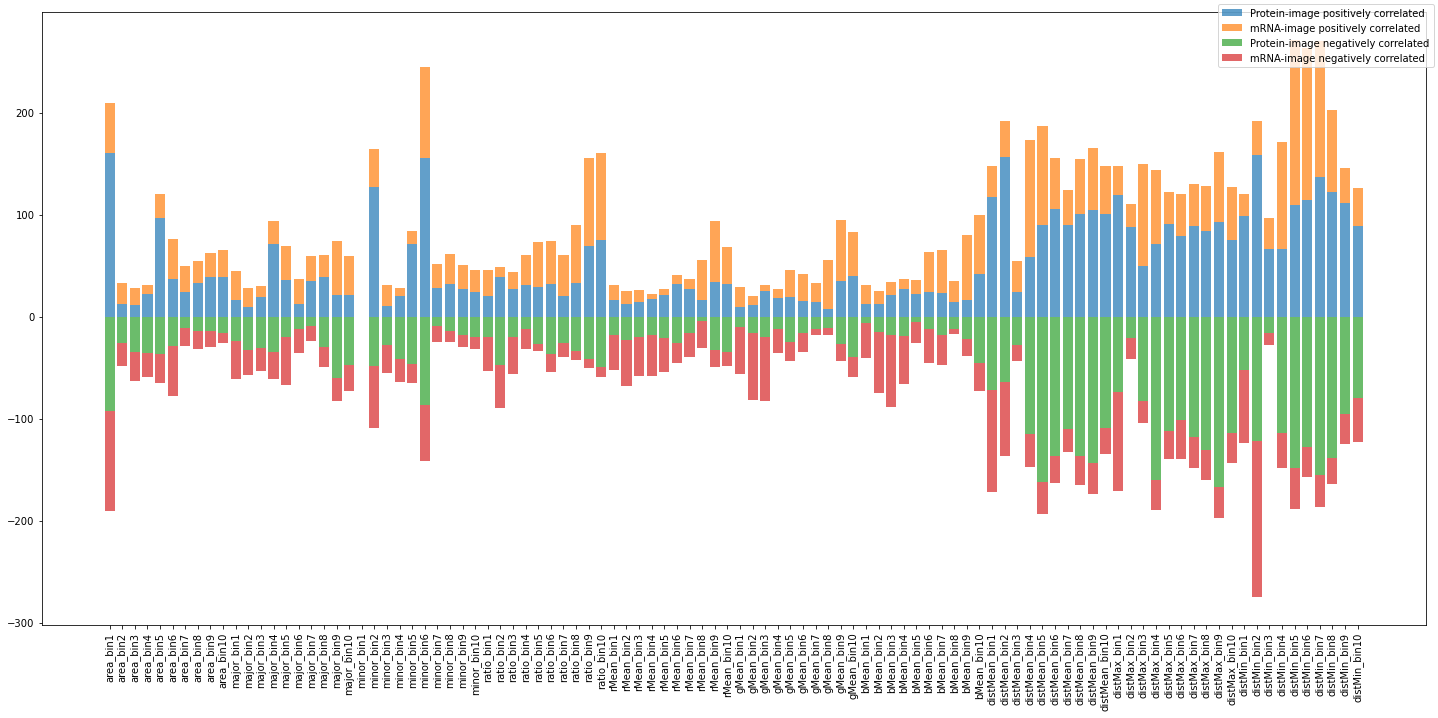

In [20]:

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)

p1 = ax.bar(features, protein_pos,alpha=0.7)
p2 = ax.bar(features, rna_pos, bottom=protein_pos,alpha=0.7)
p3 = ax.bar(features, np.negative(protein_neg),alpha=0.7)
p4 = ax.bar(features, np.negative(rna_neg), bottom=np.negative(protein_neg),alpha=0.7)
fig.legend((p1[0], p2[0],p3[0],p4[0]), ('Protein-image positively correlated', 'mRNA-image positively correlated','Protein-image negatively correlated', 'mRNA-image negatively correlated'))

plt.xticks(rotation=90)
plt.tight_layout()


plt.show()

# Survival

In [22]:
cor_s_df = pd.DataFrame(np.zeros((rna_df.shape[0],2)))
cor_s_df.columns = ['mRNA','protein']
cor_s_df.index = rna_df.index
cor_s_df.index.name = 'GeneSymbol'

In [23]:
cor_image_s_df = pd.DataFrame(np.zeros((image_df.shape[0],1)))
cor_image_s_df.columns = ['correlation']
cor_image_s_df.index = image_df.index
cor_image_s_df.index.name = 'image feature'

In [25]:
rna_df2 = rna_df[survival_df['ID']]
rna_df2.columns = survival_df['ID']
protein_df2 = protein_df[survival_df['ID']]
protein_df2.columns = survival_df['ID']
image_df2 = image_df[survival_df['ID']]
image_df2.columns = survival_df['ID']

In [26]:
l1 = survival_df['Days to death'].tolist()
for i in range(cor_s_df.shape[0]):    
    l2 = rna_df2.iloc[i].tolist()
    l3 = protein_df2.iloc[i].tolist()
    cor_s_df.iat[i,0] = spearmanr(l1, l2)[0]
    cor_s_df.iat[i,1] = spearmanr(l1, l3)[0]

c:\users\steve\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\steve\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [27]:
l1 = survival_df['Days to death'].tolist()
for i in range(cor_image_s_df.shape[0]):    
    l2 = image_df2.iloc[i].tolist()
    cor_image_s_df.iat[i,0] = spearmanr(l1, l2)[0]

In [28]:
cor_s_df

,mRNA,protein
GeneSymbol,,
A1BG,-0.129773,-0.066125
A2M,-0.032486,0.099464
AACS,-0.145525,-0.080084
AAK1,-0.436234,-0.278927
AAMP,-0.065399,-0.068985
...,...,...
ZNFX1,-0.366652,-0.105825
ZRANB2,-0.054172,-0.094086
ZW10,-0.087341,-0.219376


In [36]:
cor_image_s_df

,correlation
image feature,
area_bin1,0.088749
area_bin2,0.209387
area_bin3,0.341423
area_bin4,0.450919
area_bin5,0.479435
...,...
distMin_bin6,-0.373311
distMin_bin7,-0.306760
distMin_bin8,-0.213741


In [32]:
cor_s_df_sidebyside = pd.DataFrame(np.zeros((3, 3)))
cor_s_df_sidebyside.columns = ['Positive Correlation','Noncorrelation','Negative Correlation']
cor_s_df_sidebyside.index = ['Positive Correlation','Noncorrelation','Negative Correlation']
cor_s_df_sidebyside.columns.name = 'protein'
cor_s_df_sidebyside.index.name = 'mRNA'

In [33]:
for i in range(cor_rna_df.shape[0]):
    for j in range(cor_s_df.shape[1]):
        pvalue_r = cor_s_df.iat[i,0]
        pvalue_p = cor_s_df.iat[i,1]
        x = ''
        y = ''
        if pvalue_r > 0.3:
            x = 'Positive Correlation'
        elif pvalue_r < -0.3:
            x = 'Negative Correlation'
        else:
            x = 'Noncorrelation'
        if pvalue_p > 0.3:
            y = 'Positive Correlation'
        elif pvalue_p < -0.3:
            y = 'Negative Correlation'
        else:
            y = 'Noncorrelation'     
        cor_s_df_sidebyside.at[x,y]+=1 

In [34]:
cor_s_df_sidebyside

protein,Positive Correlation,Noncorrelation,Negative Correlation
mRNA,,,
Positive Correlation,0.0,8.0,0.0
Noncorrelation,0.0,170.0,6.0
Negative Correlation,0.0,12.0,4.0


In [35]:
cor_s_image = pd.DataFrame(np.zeros((1, 3)))
cor_s_image.columns = ['Positive Correlation','Noncorrelation','Negative Correlation']
cor_s_image.columns.name = 'image-survival'
for i in range(cor_image_s_df.shape[0]):
    pvalue = cor_image_s_df.iat[i,0]
    if pvalue > 0.3:
        cor_s_image.at[0,'Positive Correlation']+=1
    elif pvalue < -0.3:
        cor_s_image.at[0,'Negative Correlation']+=1
    elif pvalue <= 0.3:
        cor_s_image.at[0,'Noncorrelation']+=1
cor_s_image

image-survival,Positive Correlation,Noncorrelation,Negative Correlation
0,26.0,48.0,25.0


In [ ]:
cor_rna_df.to_csv(f'{cancer_type}_cor_rna.csv')  
cor_protein_df.to_csv(f'{cancer_type}_cor_protein.csv')  
image_df.to_csv(f'{cancer_type}_image.csv')  
survival_df.to_csv(f'{cancer_type}_survival.csv')  